In [74]:
import pandas as pd
import numpy as np
import os

os.getcwd()
ames_geo = pd.read_csv(r"C:\users\willf\OneDrive\Documents\NYDSA\Machine Learning Project\Machine Learning Project Proposal\ames_geo_final.csv", keep_default_na=False)

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [76]:
ames_geo.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive

In [77]:
# Drop unknown, identifier, addresses, sale-price-related and one of highly correlated columns

ames_geo_mlprep = ames_geo.drop(columns=['Unnamed: 0', 'PID', 'Prop_Addr','LogSalePrice',  
                                         'TotRmsAbvGrd', 'NmbrBRs', 'FireplaceQu', 'GarageCond', 'PoolQC'])

ames_geo_mlprep.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scr

In [78]:
# Check data types
dtypes_df = ames_geo_mlprep.dtypes.reset_index()
dtypes_df.columns = ['Column', 'DataType']
dtypes_df.to_csv("dtypes_df.csv")

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split my dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# One-hot encode
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=['object']))

# Convert back to DF
columns = encoder.get_feature_names_out(X_train.select_dtypes(include=['object']).columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=columns, index = X_test.index)

# Merge back with numeric cols
X_train_final = pd.concat([X_train.select_dtypes(exclude=['object']), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.select_dtypes(exclude=['object']),X_test_encoded_df], axis=1)

# Build Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_final, y_train)

# Feature importance
importance = pd.Series(rf_model.feature_importances_, index = X_train_final.columns)

# Model Evaluation
predictions = rf_model.predict(X_test_final)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r_squared = r2_score(y_test, predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


RMSE: 23702.541910899974
R-squared: 0.908411835181646


In [80]:
# Set up new pipeline for cross validation

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

# Define dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']

# Define transformer for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
rf_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough'
)

# Create a pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', rf_preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Evaluate model
predictions = rf_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r_squared = r2_score(y_test, predictions)
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

# Perform CV
scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", scores)


RMSE: 23666.2096044686
R-squared: 0.9086924007791
Cross-validated R-squared scores: [0.88759431 0.8990263  0.91083076 0.91475958 0.91120339]


In [81]:
# Tune Hyperparams with grid search
from joblib import Parallel
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# rf_param_grid = {
    # 'regressor__n_estimators': [100, 200, 300],
    # 'regressor__max_depth': [10, 20, 30],
    # 'regressor__min_samples_split': [2, 5, 10]
# }

# Create pipeline
# rf_pipeline = Pipeline(steps=[
    # ('preprocessor', rf_preprocessor),
    # ('regressor', RandomForestRegressor(random_state=42))])
# 
# Instantiate grid search
# rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit Grid Search
# rf_grid_search.fit(X,y)

# print("Best Parameters", rf_grid_search.best_params_)

In [82]:
# Re-model with best params

rf_final_model = Pipeline(steps=[
    ('preprocessor', rf_preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators= 200,
        max_depth= 20,
        min_samples_split=2,
        random_state=42
    ))
])

# Fit the final model
rf_final_model.fit(X_train, y_train)

# Make predictions and evaluate the model
rf_predictions = rf_final_model.predict(X_test)
r2 = r2_score(y_test, rf_predictions)
print(f"R-squared error: {r2}")

# Get rf model feature importance
rf_feature_importances = rf_final_model.named_steps['regressor'].feature_importances_
encoded_features = rf_final_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)
numeric_features = X.select_dtypes(exclude=['object']).columns

# Combine feature names
all_features = np.concatenate([encoded_features, numeric_features])

# Map feature importance to feature names
rf_feature_importance_dict = dict(zip(all_features, rf_feature_importances))

# Sort by importance
sorted_feature_importance = sorted(rf_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

rf_feature_importance = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'], index=None)

rf_feature_importance.to_csv("rf_feature_importance_4.csv", index=False)


R-squared error: 0.9099387369255587


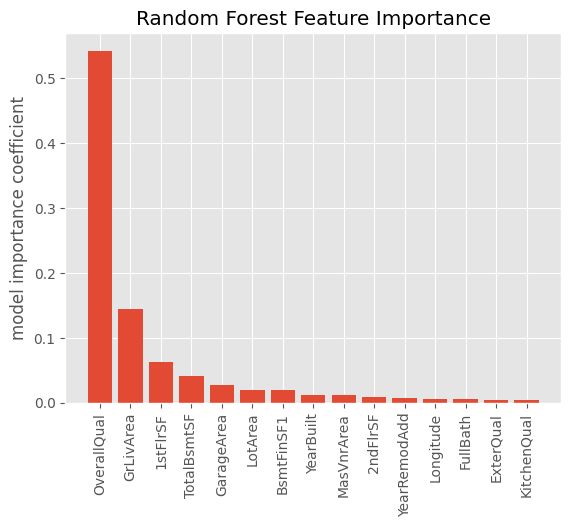

In [83]:
import matplotlib.pyplot as plt
rf_feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
rf_importance_15 = rf_feature_importance.head(15)
plt.bar(rf_importance_15['Feature'], rf_importance_15['Importance'])
plt.xticks(rotation=90)
plt.ylabel('model importance coefficient')
plt.title("Random Forest Feature Importance")
plt.show()

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
100%|===================| 1781/1789 [01:48<00:00]        

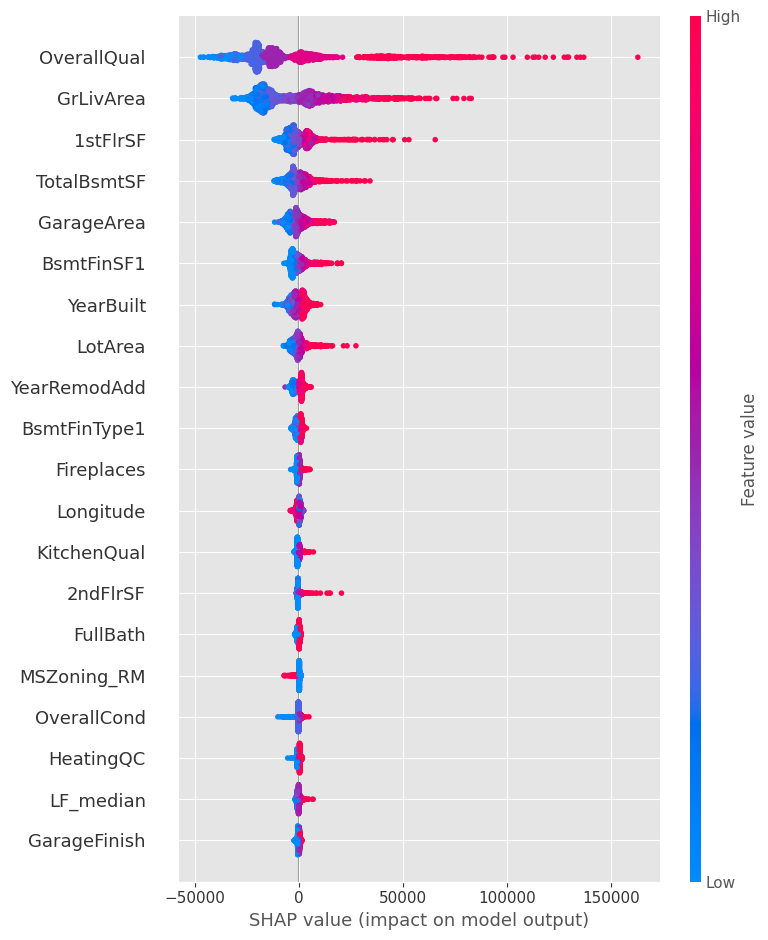

In [84]:
# Get RF SHAP values

import shap
import scipy.sparse 

rf_model = rf_final_model.named_steps['regressor']

# Preprocess 
X_train_preprocessed = rf_final_model.named_steps['preprocessor'].transform(X_train)

# Convert one-hot encoded data to dense format
if isinstance(X_train_preprocessed, scipy.sparse.csr.csr_matrix):
    X_train_preprocessed = X_train_preprocessed.toarray()


encoded_features = rf_final_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer
explainer = shap.Explainer(rf_model, X_train_preprocessed)

shap_values = explainer(X_train_preprocessed)

shap.summary_plot(shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names)


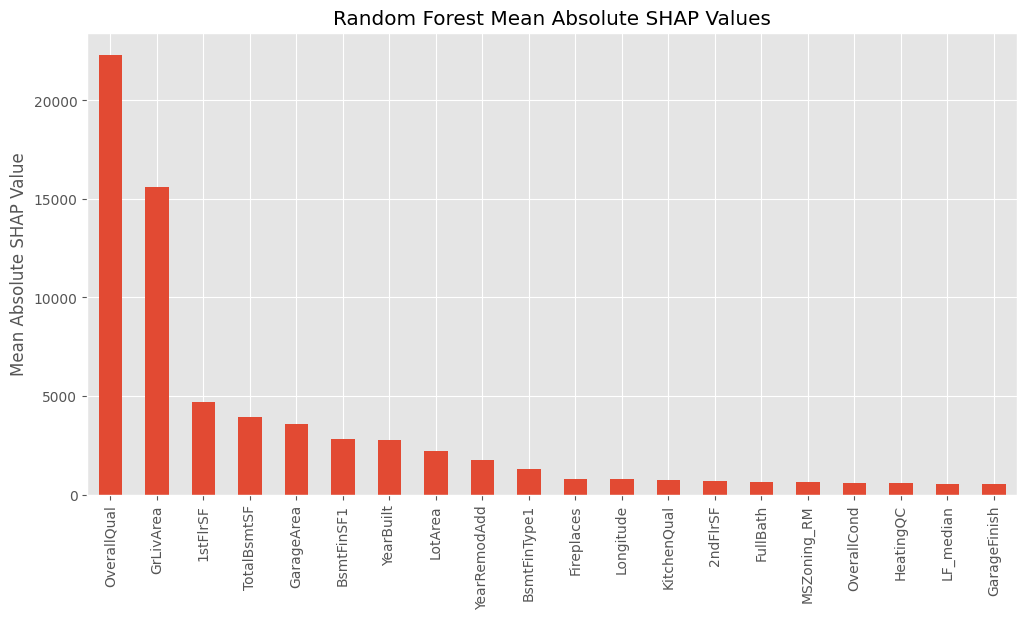

In [87]:
# Plot mean ABS SHAP values

# Calculate the mean abs SHAP values per feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a series with features and mean abs SHAP values
mean_abs_shap_series = pd.Series(mean_abs_shap_values, index=preprocessed_feature_names)

# Sort 
sorted_shap_series = mean_abs_shap_series.sort_values(ascending=False)

# Plot 
top_n_features = 20  
sorted_shap_series.head(top_n_features).plot(kind='bar', figsize=(12, 6), title='Random Forest Mean Absolute SHAP Values')
plt.ylabel('Mean Absolute SHAP Value')
plt.show()


------------------------Methods to Check Model Reliability -----------------------------
I don't trust the shap values I'm getting here so I want to try a few things to understand how reliable they are

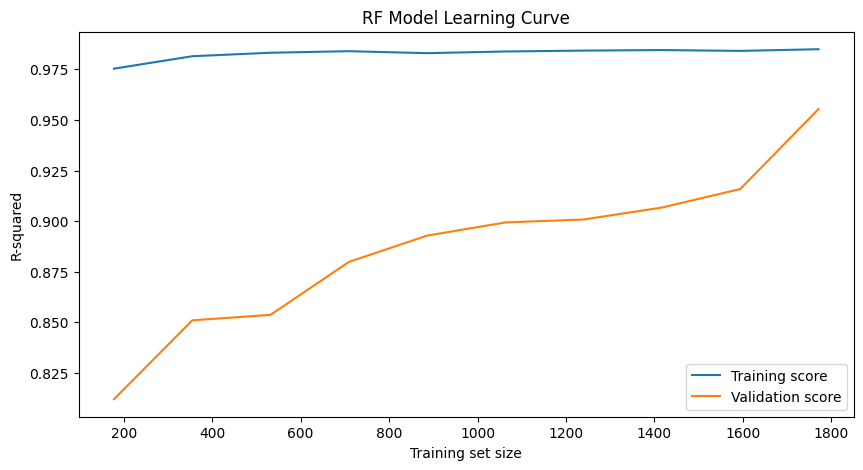

In [12]:
# Learning Curve - see how model improves with more data - also get SHAP as I train

from sklearn.metrics import mean_squared_error, r2_score

def compute_shap_values(model, X_train, y_train, X_val):
    model.fit(X_train, y_train)  

    # Create SHAP explainer and calculate SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val)

    # calc mean SHAP values
    mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)
    return mean_abs_shap_values

# Create list to store results
train_sizes = []
train_scores = []
validation_scores = []
mean_abs_shap_values_list = []

# Define range of training set sizes 
for frac in np.linspace(0.1, 0.99, 10):
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_train_final, y_train, train_size=frac, random_state=42
    )

    # Compute shap for current subset
    mean_abs_shap_values = compute_shap_values(rf_model, X_train_sub, y_train_sub, X_val_sub)    
    mean_abs_shap_values_list.append(mean_abs_shap_values)
    
    # Store training set size
    train_sizes.append(X_train_sub.shape[0])

    # Eval
    train_predictions = rf_model.predict(X_train_sub)
    train_score = r2_score(y_train_sub, train_predictions)
    train_scores.append(train_score)

    # Eval subset on validation set
    val_predictions = rf_model.predict(X_val_sub)
    val_score = r2_score(y_val_sub, val_predictions)
    validation_scores.append(val_score)

# Convert results to arrays 
train_sizes = np.array(train_sizes)
train_score = np.array(train_score)
validation_scores = np.array(validation_scores)
mean_abs_shap_values_list = np.array(mean_abs_shap_values_list)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores, label='Training score')
plt.plot(train_sizes, validation_scores, label='Validation score')
plt.ylabel('R-squared')
plt.xlabel('Training set size')
plt.title('RF Model Learning Curve')
plt.legend()
plt.show()

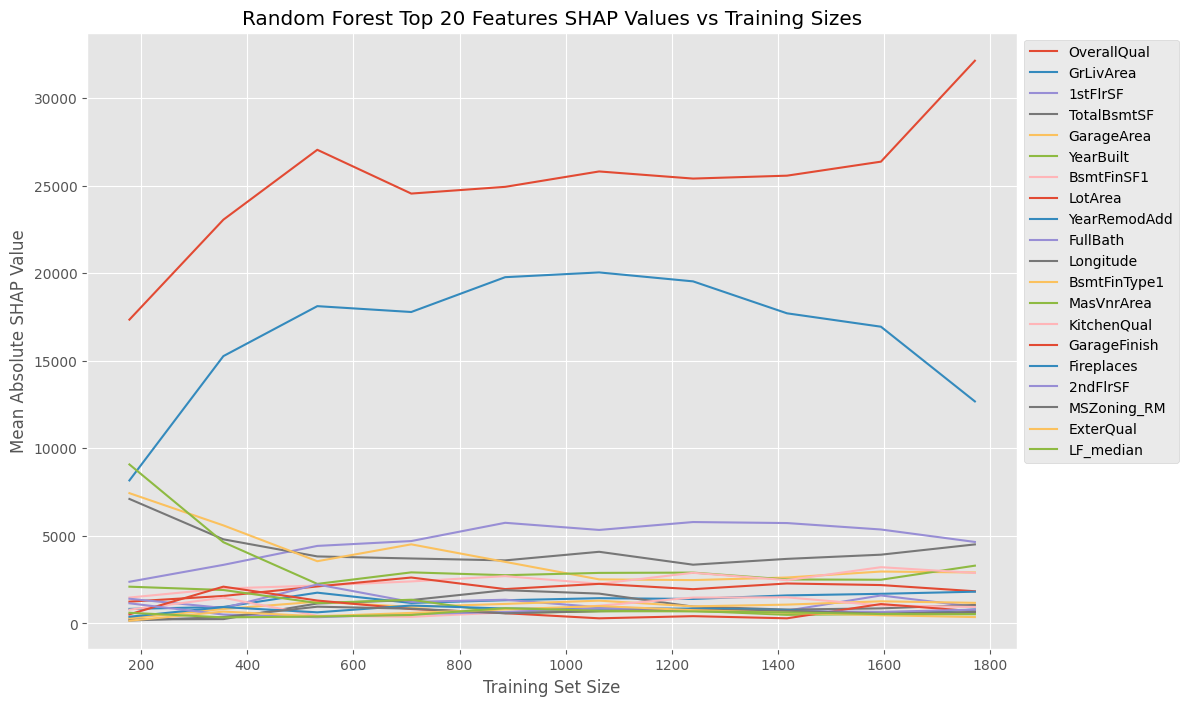

In [58]:
# Create a plot of the change in SHAP values as training set rises like above
import numpy as np
import matplotlib.pyplot as plt

# Number of top features to consider
num_top_features = 20

# Calc avg SHAP values
average_shap_values = np.mean(mean_abs_shap_values_list, axis=0)

# Get indices of top features according to mean abs shap values
sorted_top_feature_indices = np.argsort(average_shap_values)[-num_top_features:][::-1]

# Get the names of the top features
sorted_top_feature_names = X_train_final.columns[sorted_top_feature_indices]

# Plot
plt.figure(figsize=(12, 8))

# For each top feature, plot its SHAP values across different training sizes
for feature_idx in sorted_top_feature_indices:
    feature_name = X_train_final.columns[feature_idx]
    plt.plot(train_sizes, mean_abs_shap_values_list[:, feature_idx], label=feature_name)

plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute SHAP Value')
plt.title('Random Forest Top 20 Features SHAP Values vs Training Sizes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Note for bootstrapping - X_sample_transformed becomes a sparse matrix which needs to be converted back to a dense matrix for the func to work!!!

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed: 2

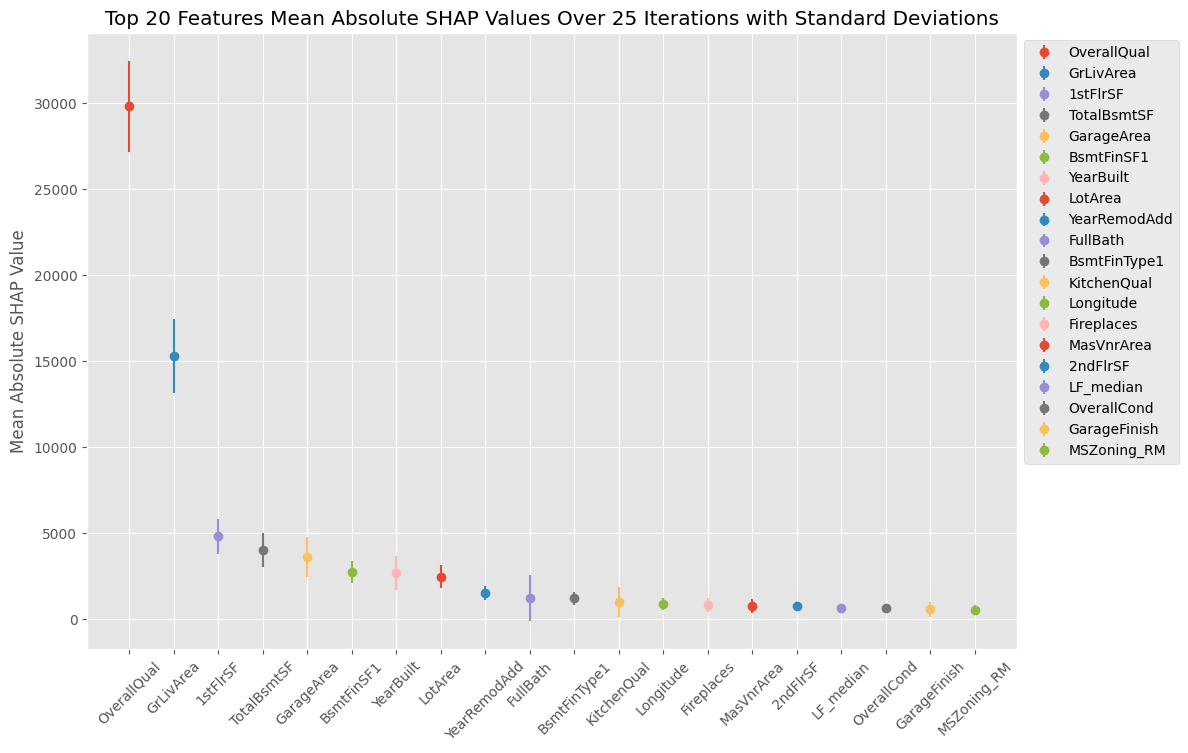

In [46]:
# Plot mean abs SHAP values and their stan devs over many iterations of bootstrapped model
from joblib import Parallel, delayed
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
import shap
import numpy as np
import matplotlib.pyplot as plt

def compute_shap_for_iteration(X, y):
    # Bootstrap sample
    X_sample, y_sample = resample(X, y)
 
    # Fit model
    model = RandomForestRegressor()
    model.fit(X_sample, y_sample)
 
    # Calc SHAP
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)
    return np.abs(shap_values)

# Number of iterations 
num_iterations = 500

# Parallelize SHAP calc
shap_values_iterations = Parallel(n_jobs=-1, verbose=10)(
    delayed(compute_shap_for_iteration)(X_train_final, y_train) for _ in range(num_iterations)
)

# Calc avg SHAP per iteration
shap_values_per_iteration = np.mean(shap_values_iterations, axis=1)

# Calc mean and st dev
mean_abs_shap_values = np.mean(shap_values_per_iteration, axis=0)
std_abs_shap_values = np.std(shap_values_per_iteration, axis=0)

# Plot
plt.figure(figsize=(12, 8))

# Number of top features to consider
num_top_features = 20

# Get indices of top features according to mean abs shap values
sorted_top_feature_indices = np.argsort(mean_abs_shap_values)[-num_top_features:][::-1]

# For each top feature, plot mean SHAP value with stan dev as error bars
for idx, feature_idx in enumerate(sorted_top_feature_indices):
    feature_name = X_train_final.columns[feature_idx]
    plt.errorbar(idx, mean_abs_shap_values[feature_idx], yerr=std_abs_shap_values[feature_idx], fmt='o', label=feature_name)

plt.xticks(range(num_top_features), [X_train_final.columns[i] for i in sorted_top_feature_indices], rotation=45)
plt.ylabel('Mean Absolute SHAP Value')
plt.title('Top 20 Features Mean Absolute SHAP Values Over 25 Iterations with Standard Deviations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Interpretation: from the above chart and further up showing SHAP values over different size samples, we can see that SHAP values for this random forest model are highly unstable, often with standard deviations of over 50% of the value and st dev ranges that change the SHAP values from postive to negative. This suggests that the dataset is not large enough to reliably conclude how different features impact house prices, despite the fact that the data is sufficient for making good predictions of house prices with the same model. In other words, the model can find an equation to accurately predict house prices, but we should not trust that the weighting that equation gives to different features actually represents the importance of those features to house prices. There are many ways to arrive at a conclusion (90% accurate prediction) and we just don't know if this model is the right way.  

-------------------------------------Now will move on to try XGBoost---------------------------------------------

In [21]:
# Run XGboost with one-hot encoding and pipeline creation

import xgboost as xgb

# Set up new pipeline for cross validation

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']

# Define transformer for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough'
)

# Create pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', xgb_preprocessor),
                           ('regressor', xgb.XGBRFRegressor(objective='reg:squarederror', random_state=42))])

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Fit 
xgb_pipeline.fit(X_train, y_train)

# Evaluate 
xgb_predictions = xgb_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
r_squared = r2_score(y_test, xgb_predictions)
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

# Perform CV
scores = cross_val_score(xgb_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", scores)


RMSE: 26363.97185614811
R-squared: 0.8866892303698115
Cross-validated R-squared scores: [0.86209193 0.87649752 0.87928445 0.89946708 0.88200128]


In [23]:
# Tune xgboost hyperparams

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# XGboost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Hyperparams grid
param_dist = {
    'regressor__n_estimators': randint(100,1000),
    'regressor__learning_rate': uniform(0.01, 0.6),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 6),
    'regressor__gamma': uniform(0, 0.5),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5)
}

# Randomized search
random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='r2', random_state=42, n_jobs=-1)

# Fit random search model
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'regressor__colsample_bytree': 0.8167004271583629, 'regressor__gamma': 0.12007280938909654, 'regressor__learning_rate': 0.05551799686519835, 'regressor__max_depth': 3, 'regressor__min_child_weight': 3, 'regressor__n_estimators': 473, 'regressor__subsample': 0.8488337868484659}


In [24]:
# Rerun XGboost on hyperparm optimized values

# Define dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define transformer for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough'
)

# Best params from random search
best_params_xgb = random_search.best_params_

# Create new pipeline with preprocessor, XGBoost regressor with the best parameters
best_xgb_pipeline = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror',
                                   n_estimators=best_params_xgb['regressor__n_estimators'],
                                   learning_rate=best_params_xgb['regressor__learning_rate'],
                                   max_depth=best_params_xgb['regressor__max_depth'],
                                   min_child_weight=best_params_xgb['regressor__min_child_weight'],
                                   gamma=best_params_xgb['regressor__gamma'],
                                   subsample=best_params_xgb['regressor__subsample'],
                                   colsample_bytree=best_params_xgb['regressor__colsample_bytree'],
                                   random_state=42))
])

# Fit 
best_xgb_pipeline.fit(X_train, y_train)

# Predict 
xgb_predictions = best_xgb_pipeline.predict(X_test)

# Calc metrics
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
r_squared = r2_score(y_test, xgb_predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")


RMSE: 19620.69968939451
R-squared: 0.9372406420629493


In [25]:
# Extract feature importance from best XGBoost model

xgb_feature_importances = best_xgb_pipeline.named_steps['regressor'].feature_importances_

# Get feature names after one-hot encoding
encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)

# Get numeric feature names
numeric_features = X.select_dtypes(exclude=['object']).columns

# Combine feature names
all_features = np.concatenate([encoded_features, numeric_features])

# Map feature importance to feature names
feature_importance_dict = dict(zip(all_features, xgb_feature_importances))

# Sort by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

xgb_feature_importance = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'], index=None)

# Save to csv
# xgb_feature_importance.to_csv("xgb_feature_importance_1.csv", index=False)

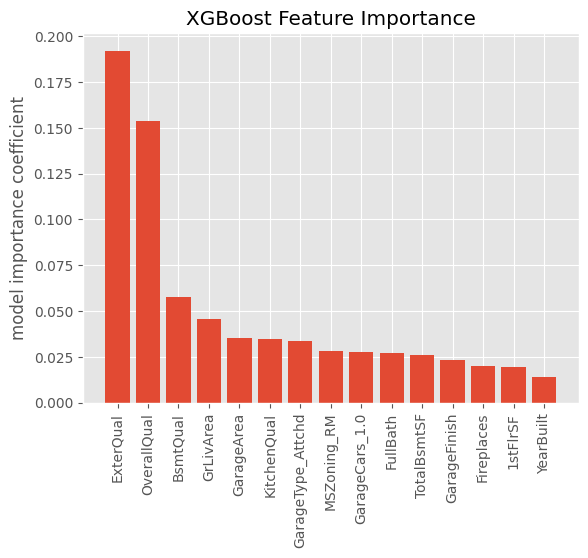

In [56]:
# Plot Feature Importance - top 15

xgb_importance_15 = xgb_feature_importance.head(15)
plt.bar(xgb_importance_15['Feature'], xgb_importance_15['Importance'])
plt.xticks(rotation=90)
plt.ylabel('model importance coefficient')
plt.title("XGBoost Feature Importance")
plt.show()

--------------------------------------- Feature Importance ------------------------------------------------
The feature importance levels from the RF model differ significantly from those from the XGB model. Since my goal is understand individual feature importance and feature interactions (importance of features in concert), I want to explore different measures/methods of feature importance like SHAP, Permuation Feature Importance, PDP & ICE plots, and more. 

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
[18:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


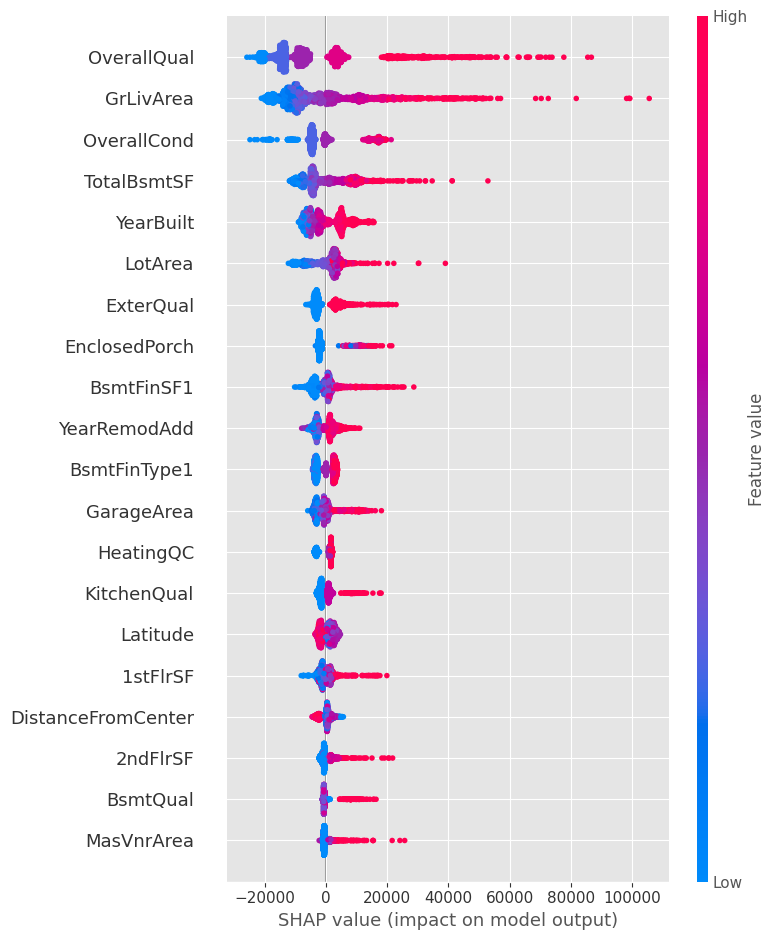

In [136]:
# Get XGBoost SHAP values and plot SHAP summary

import shap
import scipy.sparse 
xgb_model = best_xgb_pipeline.named_steps['regressor']

# Preprocess
X_train_preprocessed = best_xgb_pipeline.named_steps['preprocessor'].transform(X_train)

# Convert one-hot encoded data to dense format
if isinstance(X_train_preprocessed, scipy.sparse.csr.csr_matrix):
    X_train_preprocessed = X_train_preprocessed.toarray()


encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_preprocessed)

shap_values = explainer(X_train_preprocessed)

# Plot
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names)


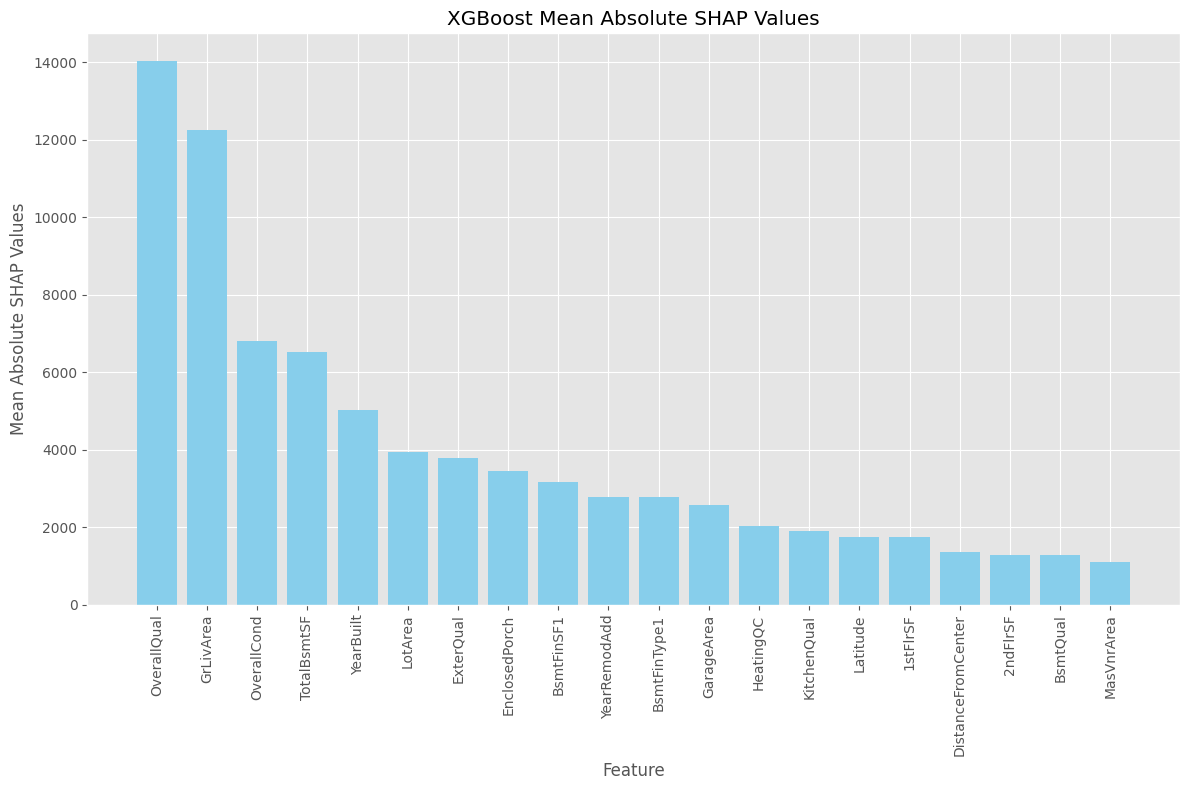

In [137]:
# Plot mean absolute shap values to compare to RF
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

feature_names = preprocessed_feature_names

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_abs_shap
})

top_features = feature_importance.sort_values(by='mean_abs_shap', ascending=False).head(20)

plt.style.use("ggplot")
# Plot
plt.figure(figsize=(12,8))
plt.bar(top_features['feature'], top_features['mean_abs_shap'], color='skyblue')
plt.ylabel('Mean Absolute SHAP Values')
plt.xlabel('Feature')
plt.title('XGBoost Mean Absolute SHAP Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


[18:53:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


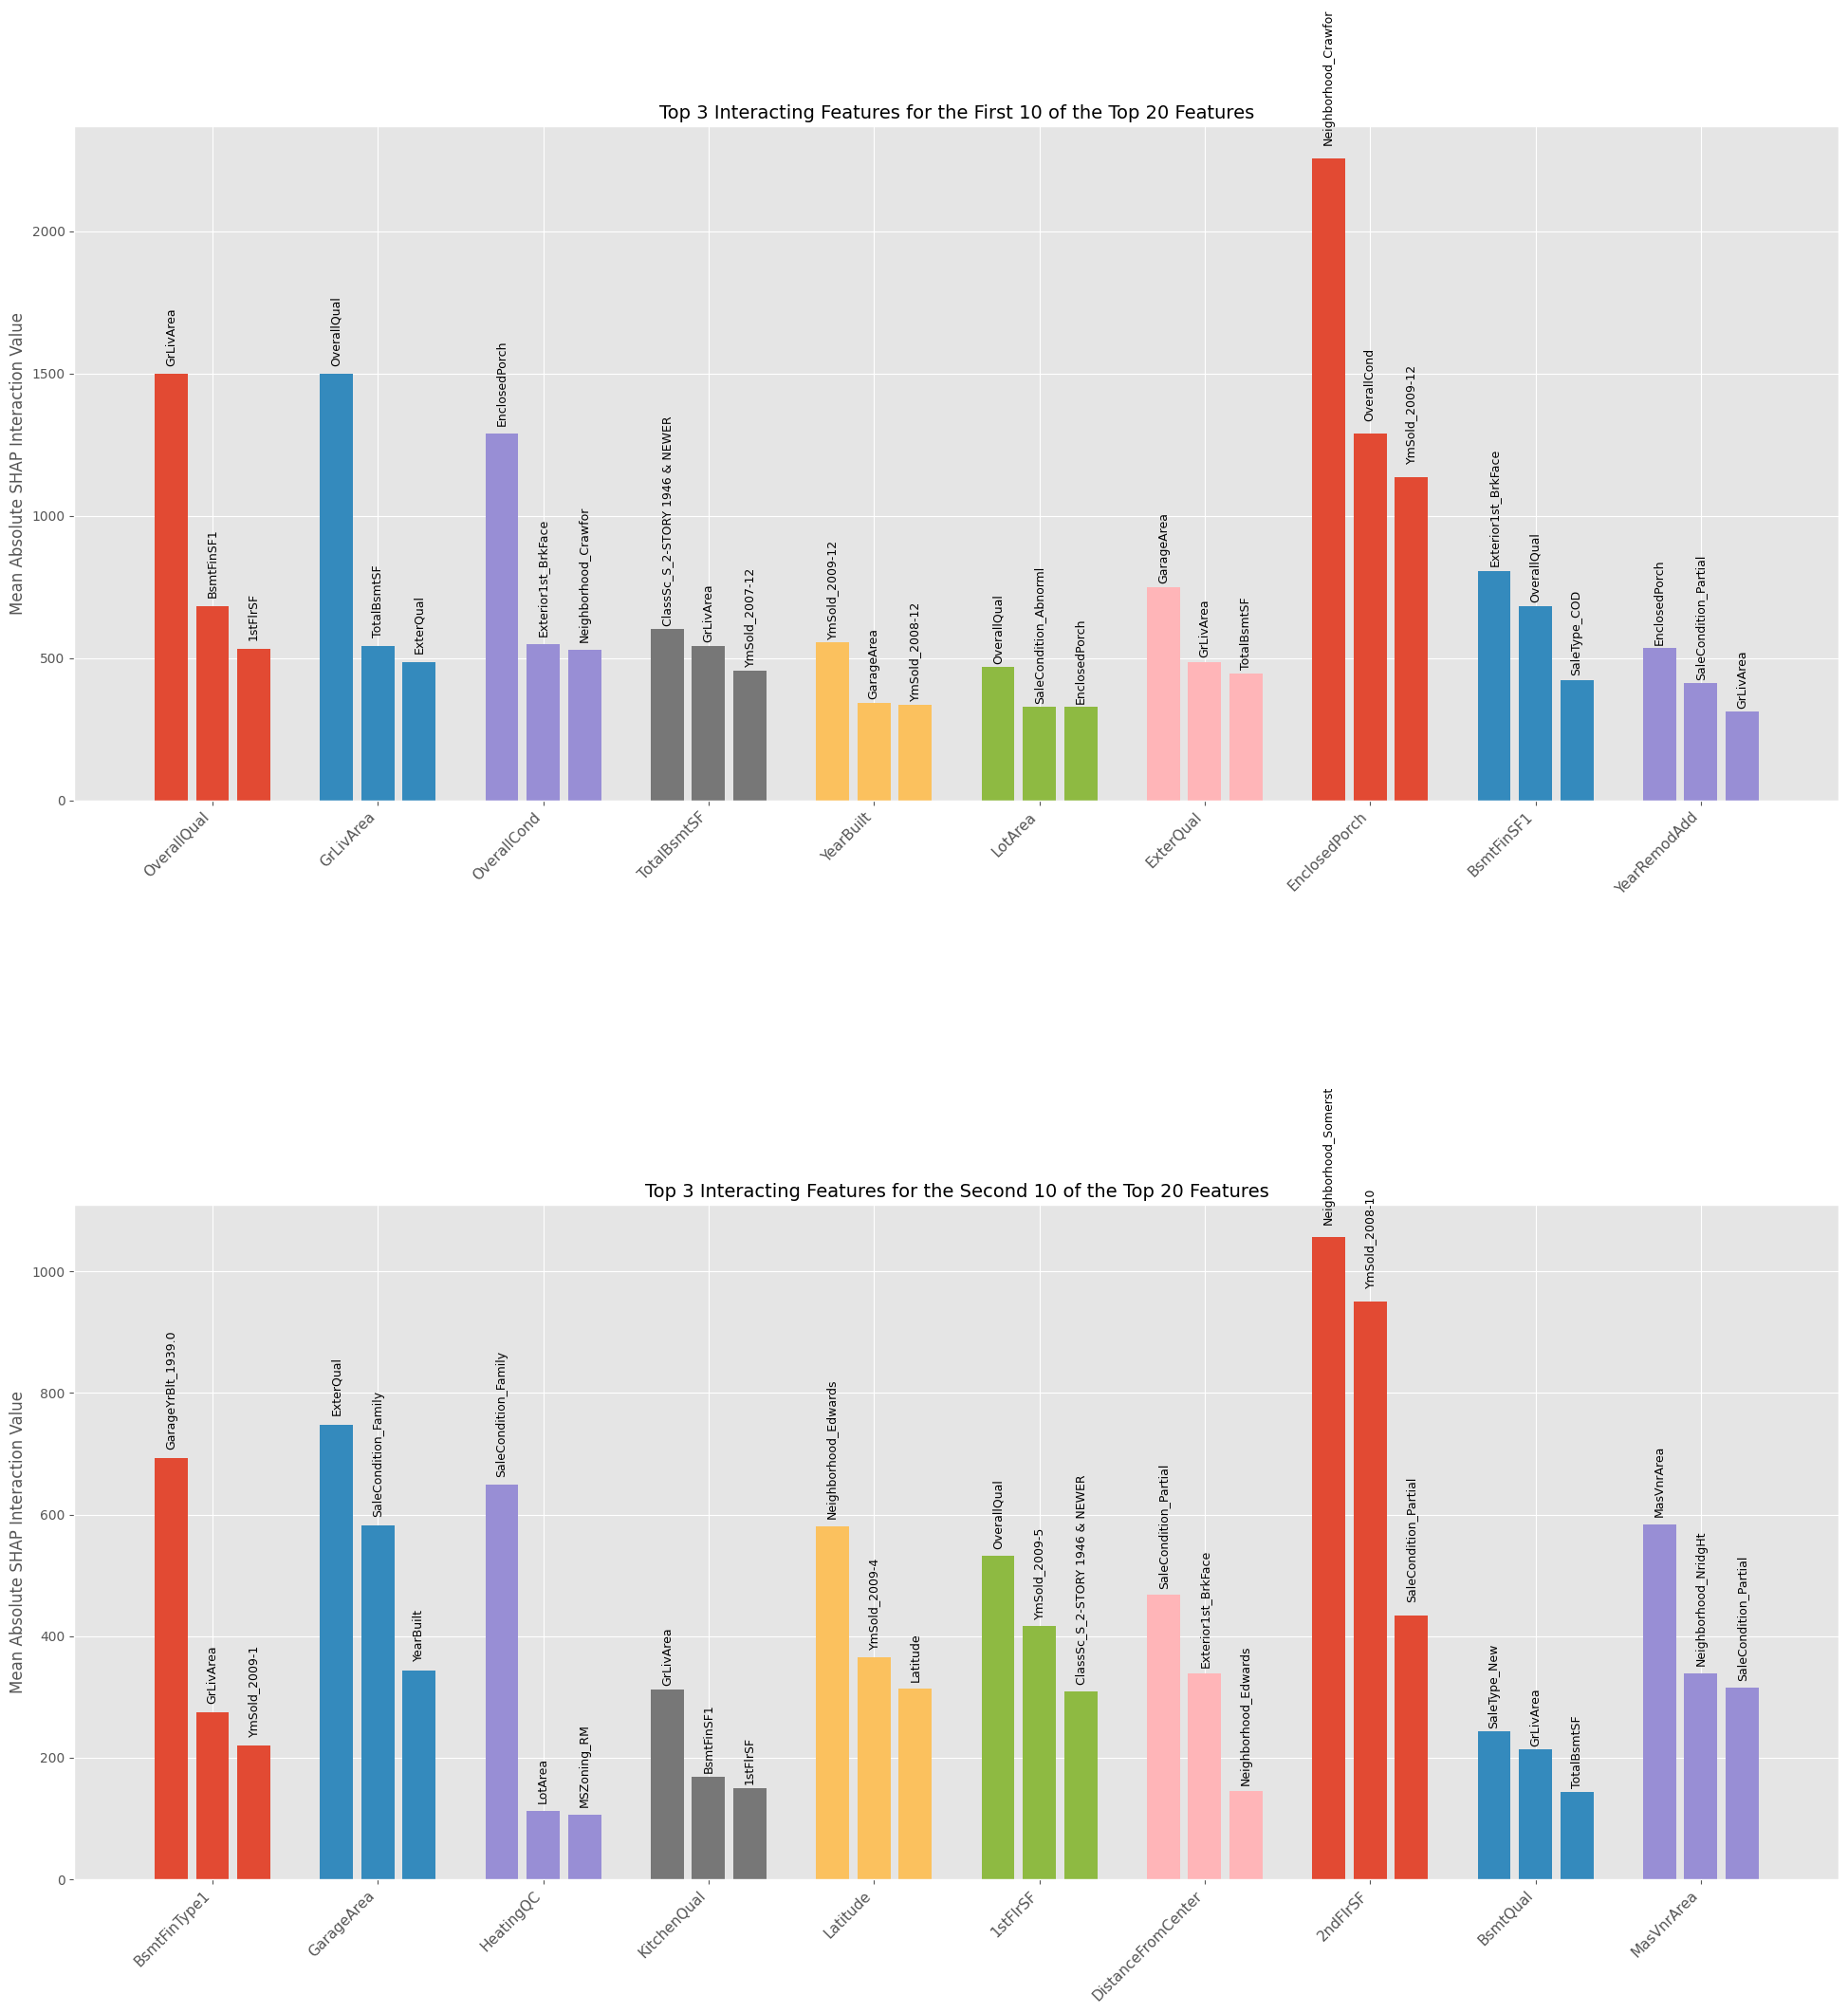

In [147]:
# Create and plot top 3 interaction features for each of the top 20 XGB model features (by mean abs SHAP val)

xgb_model = best_xgb_pipeline.named_steps['regressor']

# Create SHAP explainer 
explainer = shap.Explainer(xgb_model, feature_names=preprocessed_feature_names)

# Calc interaction values
interaction_values = explainer.shap_interaction_values(X_train_preprocessed)

# Calc mean interaction values across all samples
mean_interaction_values = np.abs(interaction_values).mean(axis=0)

top_20_feature_names = top_features['feature'].head(20)

# Initialize a dictionary to hold the top 3 interactions for each feature
top_interactions = {}

# Iterate over each of the top 20 features
for feature in top_20_feature_names:
    # Get the index of the feature
    feature_idx = np.where(preprocessed_feature_names == feature)[0][0]
    
    # Get the interaction values of this feature with all other features
    feature_interactions = mean_interaction_values[feature_idx, :]
    
    # Get the top 3 interactions excluding  self-interaction
    top_3_idx = np.argsort(feature_interactions)[-4:-1]  # Exclude last one: the feature itself
    top_3_features = preprocessed_feature_names[top_3_idx]
    top_3_values = feature_interactions[top_3_idx]

    # Store in dictionary
    top_interactions[feature] = (top_3_features, top_3_values)

import matplotlib.pyplot as plt

# Create func for plotting
def plot_feature_interactions(interactions_dict, features, ax):
    for i, feature in enumerate(features):
        # Get the top 3 interactions for the feature
        interacting_features, values = interactions_dict[feature]
        sorted_idx = np.argsort(values)[::-1]  # Sort the values in descending order
        values = values[sorted_idx]
        interacting_features = interacting_features[sorted_idx]

        # Position of bars for this feature
        bar_positions = np.array(range(i*4, i*4 + 3))
        
        # Plot the bars
        ax.bar(bar_positions, values)

        # Annotate bars with feature names
        for pos, val, interact_feature in zip(bar_positions, values, interacting_features):
            ax.text(pos, val + 0.02 * max(values), interact_feature, ha='center', va='bottom', rotation=90, fontsize=9)

    # Set the x-ticks to be in the middle of each group of bars
    ax.set_xticks([i*4 + 1 for i in range(len(features))])
    ax.set_xticklabels(features, rotation=45, ha='right', fontsize=11)
    ax.set_ylabel('Mean Absolute SHAP Interaction Value', fontsize=12)

# Split the top 20 features into two groups of 10
first_10_features = list(top_20_feature_names)[:10]
second_10_features = list(top_20_feature_names)[10:]

# Create subplots 
fig, axs = plt.subplots(2, 1, figsize=(24, 24), gridspec_kw={'hspace': 0.6})  # Adjust horizontal spacing

# Plot interactions for the first 10 features
plot_feature_interactions(top_interactions, first_10_features, axs[0])
axs[0].set_title('Top 3 Interacting Features for the First 10 of the Top 20 Features', fontsize=14)

# Plot interactions for the second 10 features
plot_feature_interactions(top_interactions, second_10_features, axs[1])
axs[1].set_title('Top 3 Interacting Features for the Second 10 of the Top 20 Features', fontsize=14)

# Show the plot with adjusted layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


[06:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-au

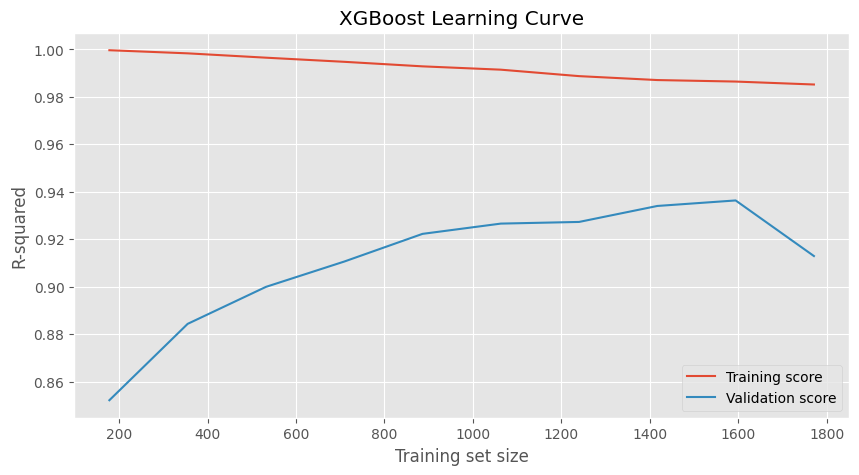

In [92]:
# Learning Curve - see how model improves with more data - also get SHAP as I train

from sklearn.metrics import mean_squared_error, r2_score

def compute_shap_values(pipeline, X_train, y_train, X_val):
    pipeline.fit(X_train, y_train)
    model = pipeline.named_steps['regressor']
   
    X_val_transformed = pipeline.named_steps['preprocessor'].transform(X_val)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val_transformed)

    # Compute mean SHAP values
    mean_shap_values = np.mean(shap_values, axis=0)
    
    transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    return pd.DataFrame({'feature': transformed_feature_names, 'mean_shap_value': mean_shap_values})

# Lists to store results
train_sizes = []
train_scores = []
validation_scores = []
shap_values_dfs = []

# Define range of training set sizes 
for frac in np.linspace(0.1, 0.99, 10):
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, train_size=frac, random_state=42)

    # Calc SHAP vals per subset
    shap_df = compute_shap_values(best_xgb_pipeline, X_train_sub, y_train_sub, X_val_sub)    
    shap_values_dfs.append(shap_df)
    
    # Store training set size
    train_sizes.append(X_train_sub.shape[0])

    # Evaluate model by set size
    train_predictions = best_xgb_pipeline.predict(X_train_sub)
    train_score = r2_score(y_train_sub, train_predictions)
    train_scores.append(train_score)

    # Evaluate on validation set
    val_predictions = best_xgb_pipeline.predict(X_val_sub)
    val_score = r2_score(y_val_sub, val_predictions)
    validation_scores.append(val_score)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores, label='Training score')
plt.plot(train_sizes, validation_scores, label='Validation score')
plt.ylabel('R-squared')
plt.xlabel('Training set size')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()
    

[06:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[06:24:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[06:24:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[06:24:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-au

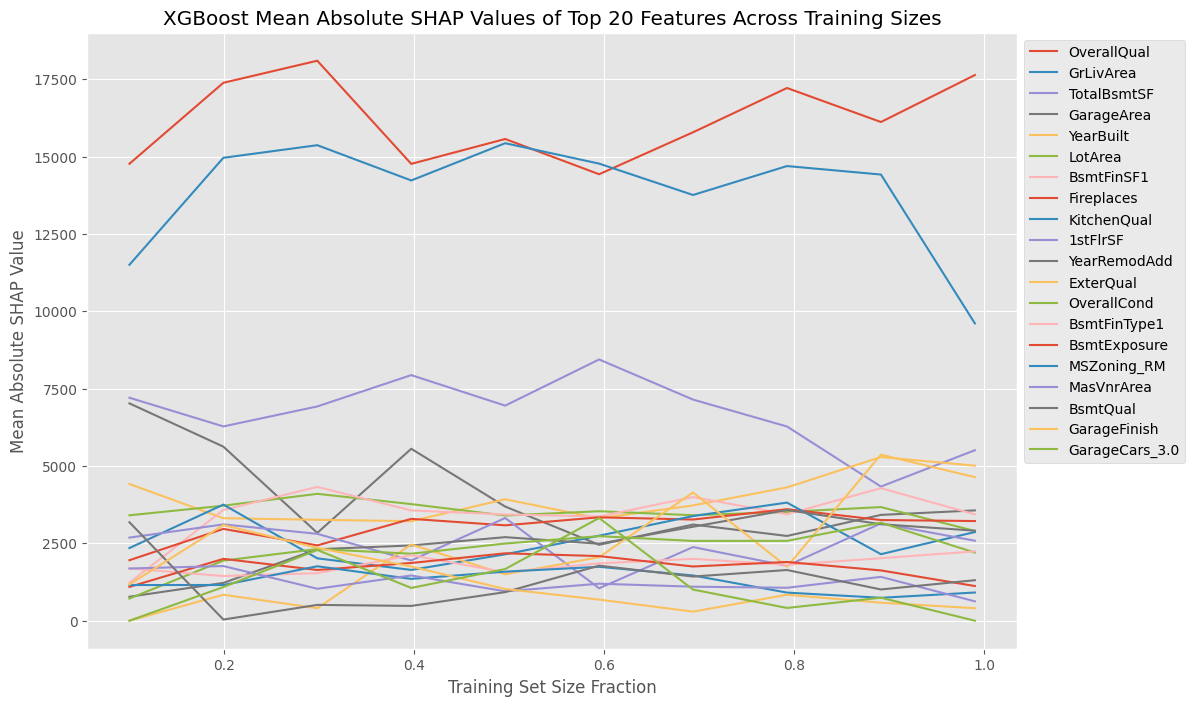

In [102]:
# Now plot the changes in SHAP values per training set size

# Function to calc abs SHAP values and pair with feature names
def compute_absolute_shap_values(pipeline, X_train, y_train, X_val):
    pipeline.fit(X_train, y_train)
    model = pipeline.named_steps['regressor']
    X_val_transformed = pipeline.named_steps['preprocessor'].transform(X_val)
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val_transformed)

    abs_shap_values = np.abs(shap_values)
    
    transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    return pd.DataFrame(abs_shap_values, columns=transformed_feature_names)

# Lists to store results
train_sizes = []
shap_values_aggregated = pd.DataFrame()

# Compute mean abs SHAP vals per training set size model
for frac in np.linspace(0.1, 0.99, 10):
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, train_size=frac, random_state=42)

    abs_shap_df = compute_absolute_shap_values(best_xgb_pipeline, X_train_sub, y_train_sub, X_val_sub)
    shap_values_aggregated[frac] = abs_shap_df.mean()

    train_sizes.append(X_train_sub.shape[0])

# Convert fractions to consistent format (e.g., string) for df column names
train_sizes_str = [str(size) for size in train_sizes]

# Get top 20 features
top_features = shap_values_aggregated.mean(axis=1).nlargest(20).index

# Remove prefix from feature names
top_features_cleaned = top_features.str.replace('^cat__|^remainder__', '', regex=True)

# Initialize df 
top_features_shap_values = pd.DataFrame(index=top_features_cleaned)

# Populate df with mean abs SHAP values for top features across all training sizes
for size in shap_values_aggregated.columns:
    for feature, cleaned_feature in zip(top_features, top_features_cleaned):
        top_features_shap_values.at[cleaned_feature, size] = shap_values_aggregated.at[feature, size]

# Plot
plt.figure(figsize=(12, 8))
for feature in top_features_shap_values.index:
    plt.plot(shap_values_aggregated.columns, top_features_shap_values.loc[feature, :], label=feature)

plt.xlabel('Training Set Size Fraction')
plt.ylabel('Mean Absolute SHAP Value')
plt.title('XGBoost Mean Absolute SHAP Values of Top 20 Features Across Training Sizes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

             Mean Abs SHAP Value  Std Dev SHAP Value          2.5%  \
OverallQual         18580.164062         1338.644775  16077.142578   
GrLivArea           13602.610352         1146.550415  11414.457031   
TotalBsmtSF          5486.821289         1194.648071   3421.037109   
YearBuilt            4371.733398         1021.069031   2397.409668   
BsmtFinSF1           3829.215332          558.645264   2812.414062   
LotArea              3446.645508          492.967712   2496.783936   
GarageArea           3339.014404          662.702759   2095.545898   
Fireplaces           3059.629639          508.130951   2074.636230   
KitchenQual          2908.904541          843.350525   1332.883789   
1stFlrSF             2842.904297          690.850708   1528.779785   

                    97.5%  
OverallQual  21349.279297  
GrLivArea    15727.842773  
TotalBsmtSF   7998.867188  
YearBuilt     6380.136230  
BsmtFinSF1    4988.092773  
LotArea       4479.738770  
GarageArea    4613.227051  
Firep

<Figure size 1200x700 with 0 Axes>

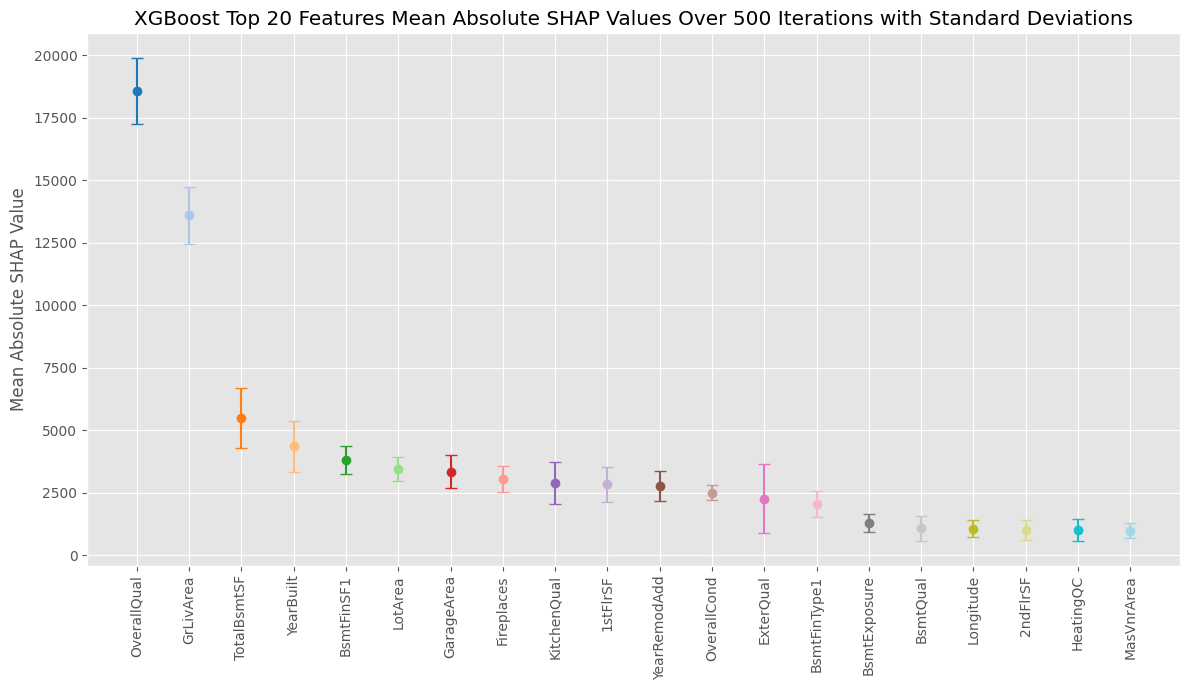

In [ ]:
# Calc mean abs shap values per feature over 500 boostrapping iterations and see avgs and st devs for variability

from joblib import Parallel, delayed
from sklearn.utils import resample

# Use the pipeline that includes the XGBoost regressor and preprocessing
xgb_pipeline = best_xgb_pipeline

# Define a function to compute SHAP values on bootstrap samples
def compute_bootstrap_shap_values(X, y, pipeline, n):
    import shap
    from sklearn.utils import resample

    # Resample the data
    X_sample, y_sample = resample(X, y, replace=True)
    
    # Train the pipeline on the resampled data
    pipeline.fit(X_sample, y_sample)
    
    # Extract the trained model from the pipeline
    trained_model = pipeline.named_steps['regressor']
    
    # Get the preprocessed features from the pipeline
    X_sample_transformed = pipeline.named_steps['preprocessor'].transform(X_sample)

    print(f"Computing SHAP values for bootstrap sample ...")

    # Create SHAP explainer and calculate SHAP values
    explainer = shap.TreeExplainer(trained_model)
    shap_values = explainer.shap_values(X_sample_transformed)

    # Calculate the mean absolute SHAP values
    mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)
    
    # Retrieve feature names
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    
    # Return the mean SHAP values along with feature names
    return pd.Series(mean_abs_shap_values, index=feature_names)

# Number of bootstrapping iterations
n_iterations = 500
n_jobs = -1  # Use all available cores

# Perform the bootstrap calculations
bootstrap_results = Parallel(n_jobs=n_jobs, verbose=10)(
    delayed(compute_bootstrap_shap_values)(X_train, y_train, xgb_pipeline, len(y_train)) for i in range(n_iterations)
)

# Convert the results to a DataFrame
bootstrap_shap_values = pd.DataFrame(bootstrap_results)

# Calculate the mean and standard deviation of the SHAP values
mean_abs_shap_values = bootstrap_shap_values.mean(axis=0)
std_shap_values = bootstrap_shap_values.std(axis=0)

# Calculate the confidence intervals
conf_intervals = bootstrap_shap_values.quantile([0.025, 0.975], axis=0).T
conf_intervals.columns = ['2.5%', '97.5%']

# Combine mean, std, and confidence intervals into one DataFrame
xgb_shap_stats = pd.DataFrame({
    'Mean Abs SHAP Value': mean_abs_shap_values, 
    'Std Dev SHAP Value': std_shap_values
}).join(conf_intervals)


# Sort the features by the absolute mean SHAP value
xgb_shap_stats = xgb_shap_stats.reindex(mean_abs_shap_values.abs().sort_values(ascending=False).index)
xgb_shap_stats.index = xgb_shap_stats.index.str.replace('remainder__', '')

# Print the top 10 features for inspection
print(xgb_shap_stats.head(10))

# Now you can use mean_shap_values and conf_intervals as needed for further analysis or plotting
top_20_features = xgb_shap_stats['Mean Abs SHAP Value'].abs().sort_values(ascending=False).head(20).index

# Plot mean of top ten most impactful features with std dev
plt.figure(figsize=(12, 7))

top_20_features = xgb_shap_stats.head(20)

# Generate a list of colors
colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(12, 7))

# Plot each feature with a unique color
for i, (feature_name, row) in enumerate(top_20_features.iterrows()):
    plt.errorbar(i, row['Mean Abs SHAP Value'], yerr=row['Std Dev SHAP Value'], fmt='o', capsize=4, color=colors[i], label=feature_name)

plt.xticks(range(len(top_20_features)), top_20_features.index, rotation=90)
plt.ylabel('Mean Absolute SHAP Value')
plt.title('XGBoost Top 20 Features Mean Absolute SHAP Values Over 500 Iterations with Standard Deviations')

# Create a custom legend
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
[22:43:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


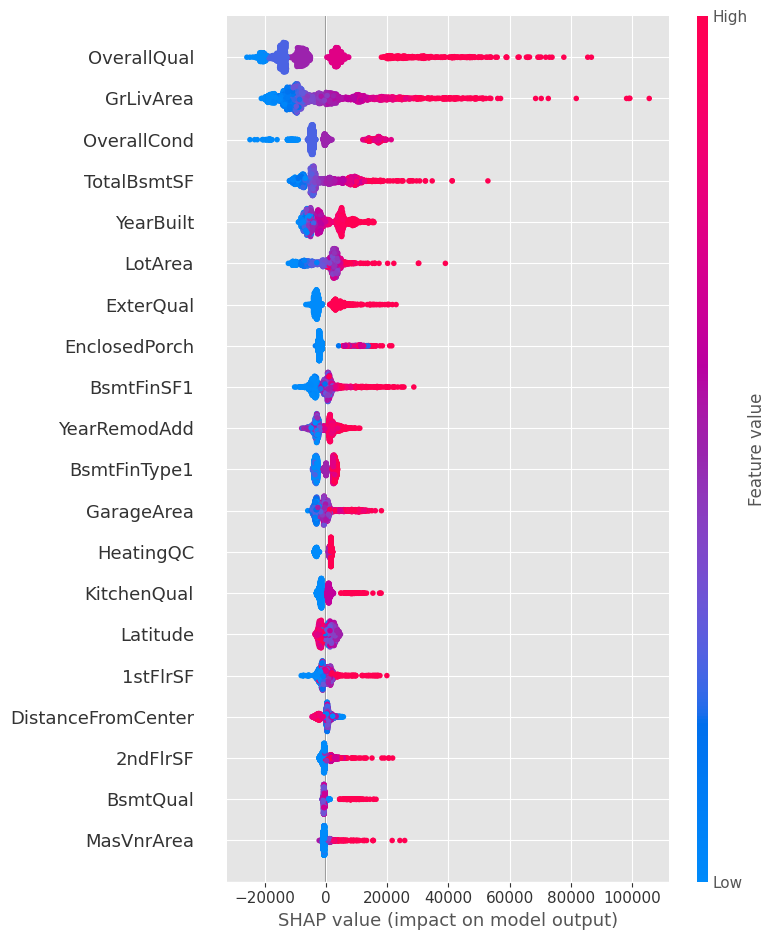

In [152]:
# Replotting SHAP summary plot

# Get XGBoost SHAP values
xgb_model = best_xgb_pipeline.named_steps['regressor']

# Preprocess using model preprocessor
X_train_preprocessed = best_xgb_pipeline.named_steps['preprocessor'].transform(X_train)

# Convert one-hot encoded data to dense format
if isinstance(X_train_preprocessed, scipy.sparse.csr.csr_matrix):
    X_train_preprocessed = X_train_preprocessed.toarray()


encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_preprocessed)

shap_values = explainer(X_train_preprocessed)

shap.summary_plot(shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names)


In [165]:
# Create collective force plot for top 10 most impactful features
import shap

# Initialize JS visualization code
shap.initjs()

# Calc mean abs SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Get the indices of the top N features in preprocessed data
top_indices = np.argsort(-mean_abs_shap_values)[:5] 

# Subset SHAP values and feature names to include only the top N features
top_shap_values = shap_values[:, top_indices]
top_feature_names = np.array(preprocessed_feature_names)[top_indices]

# Generate the collective force plot for the top N features for all instances
shap_10_force_plot = shap.force_plot(explainer.expected_value, top_shap_values.values, feature_names=top_feature_names)

# Convert the plot to HTML
# shap_html = shap.save_html("shap_10_force_plot.html", shap_10_force_plot)

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
[09:39:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


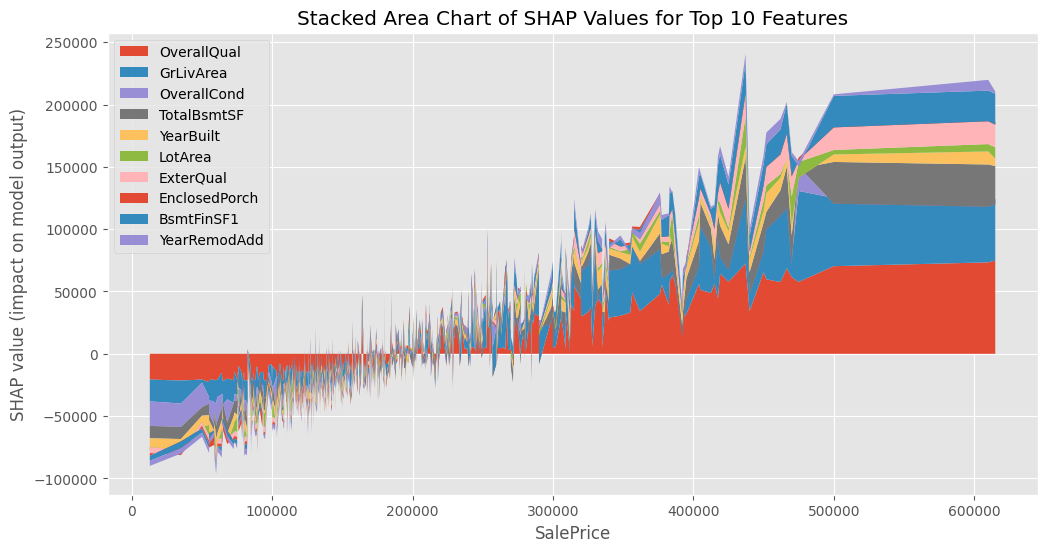

In [181]:
# Create my own collective force plot since SHAP's built-in one is too hard to read with multiple featutrd
import scipy
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess X_test
X_test_preprocessed = best_xgb_pipeline.named_steps['preprocessor'].transform(X_test)

# Convert to dense array if it's sparse
if isinstance(X_test_preprocessed, scipy.sparse.csr.csr_matrix):
    X_test_preprocessed = X_test_preprocessed.toarray()

# Get preprocessed feature names
encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_features = [col for col in X_test.columns if col not in categorical_features]
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer and calv SHAP values 
explainer = shap.Explainer(xgb_model, X_train_preprocessed)
shap_values = explainer.shap_values(X_test_preprocessed)

# Create a df for SHAP values
shap_df = pd.DataFrame(shap_values, columns=preprocessed_feature_names)

# Add y_test to the df
shap_df['SalePrice'] = y_test.reset_index(drop=True)

# Calc mean abs SHAP values and get the top 10 features
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features = preprocessed_feature_names[np.argsort(-mean_abs_shap)[:10]]

# Sort df by SalePrice
shap_df_sorted = shap_df.sort_values(by='SalePrice')

# Extract top 10 features SHAP vals
top_shap_values_sorted = shap_df_sorted[top_features]

# Define the size of the rolling window for moving avg
window_size = 1  

# Smooth SHAP vals
smoothed_shap = top_shap_values_sorted.rolling(window=window_size, min_periods=1).mean()

# SalePrice column for x-axis
x_axis_values = shap_df_sorted['SalePrice']

# Plot
plt.figure(figsize=(12, 6))
plt.stackplot(x_axis_values, smoothed_shap[top_features].T, labels=top_features)
plt.title('Stacked Area Chart of SHAP Values for Top 10 Features')
plt.xlabel('SalePrice')
plt.ylabel('SHAP value (impact on model output)')
plt.legend(loc='upper left')
plt.show()

[22:43:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


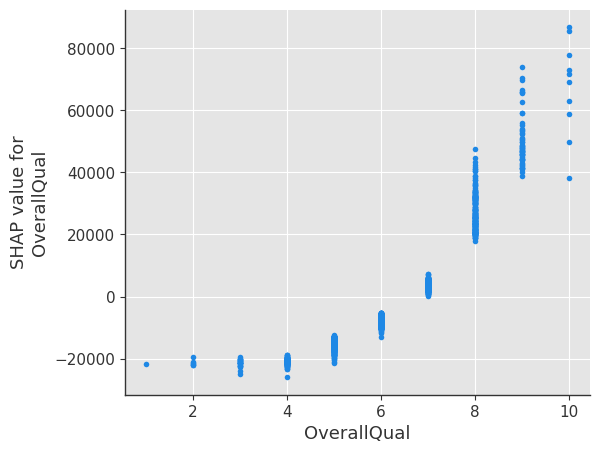

In [153]:
# Plot highly interactive pairs of features as dependence plot
import matplotlib.pyplot as plt

# Define feature name
feature_name = 'OverallQual'

# Create SHAP explainer for the model
explainer = shap.Explainer(xgb_model, X_train_preprocessed)

# Calc SHAP values for the feature
shap_values = explainer.shap_values(X_train_preprocessed)

# Generate a dependence plot for feature (and interaction feature)
shap.dependence_plot(feature_name, shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names, interaction_index=None)
